## Simple RAG Pipeline

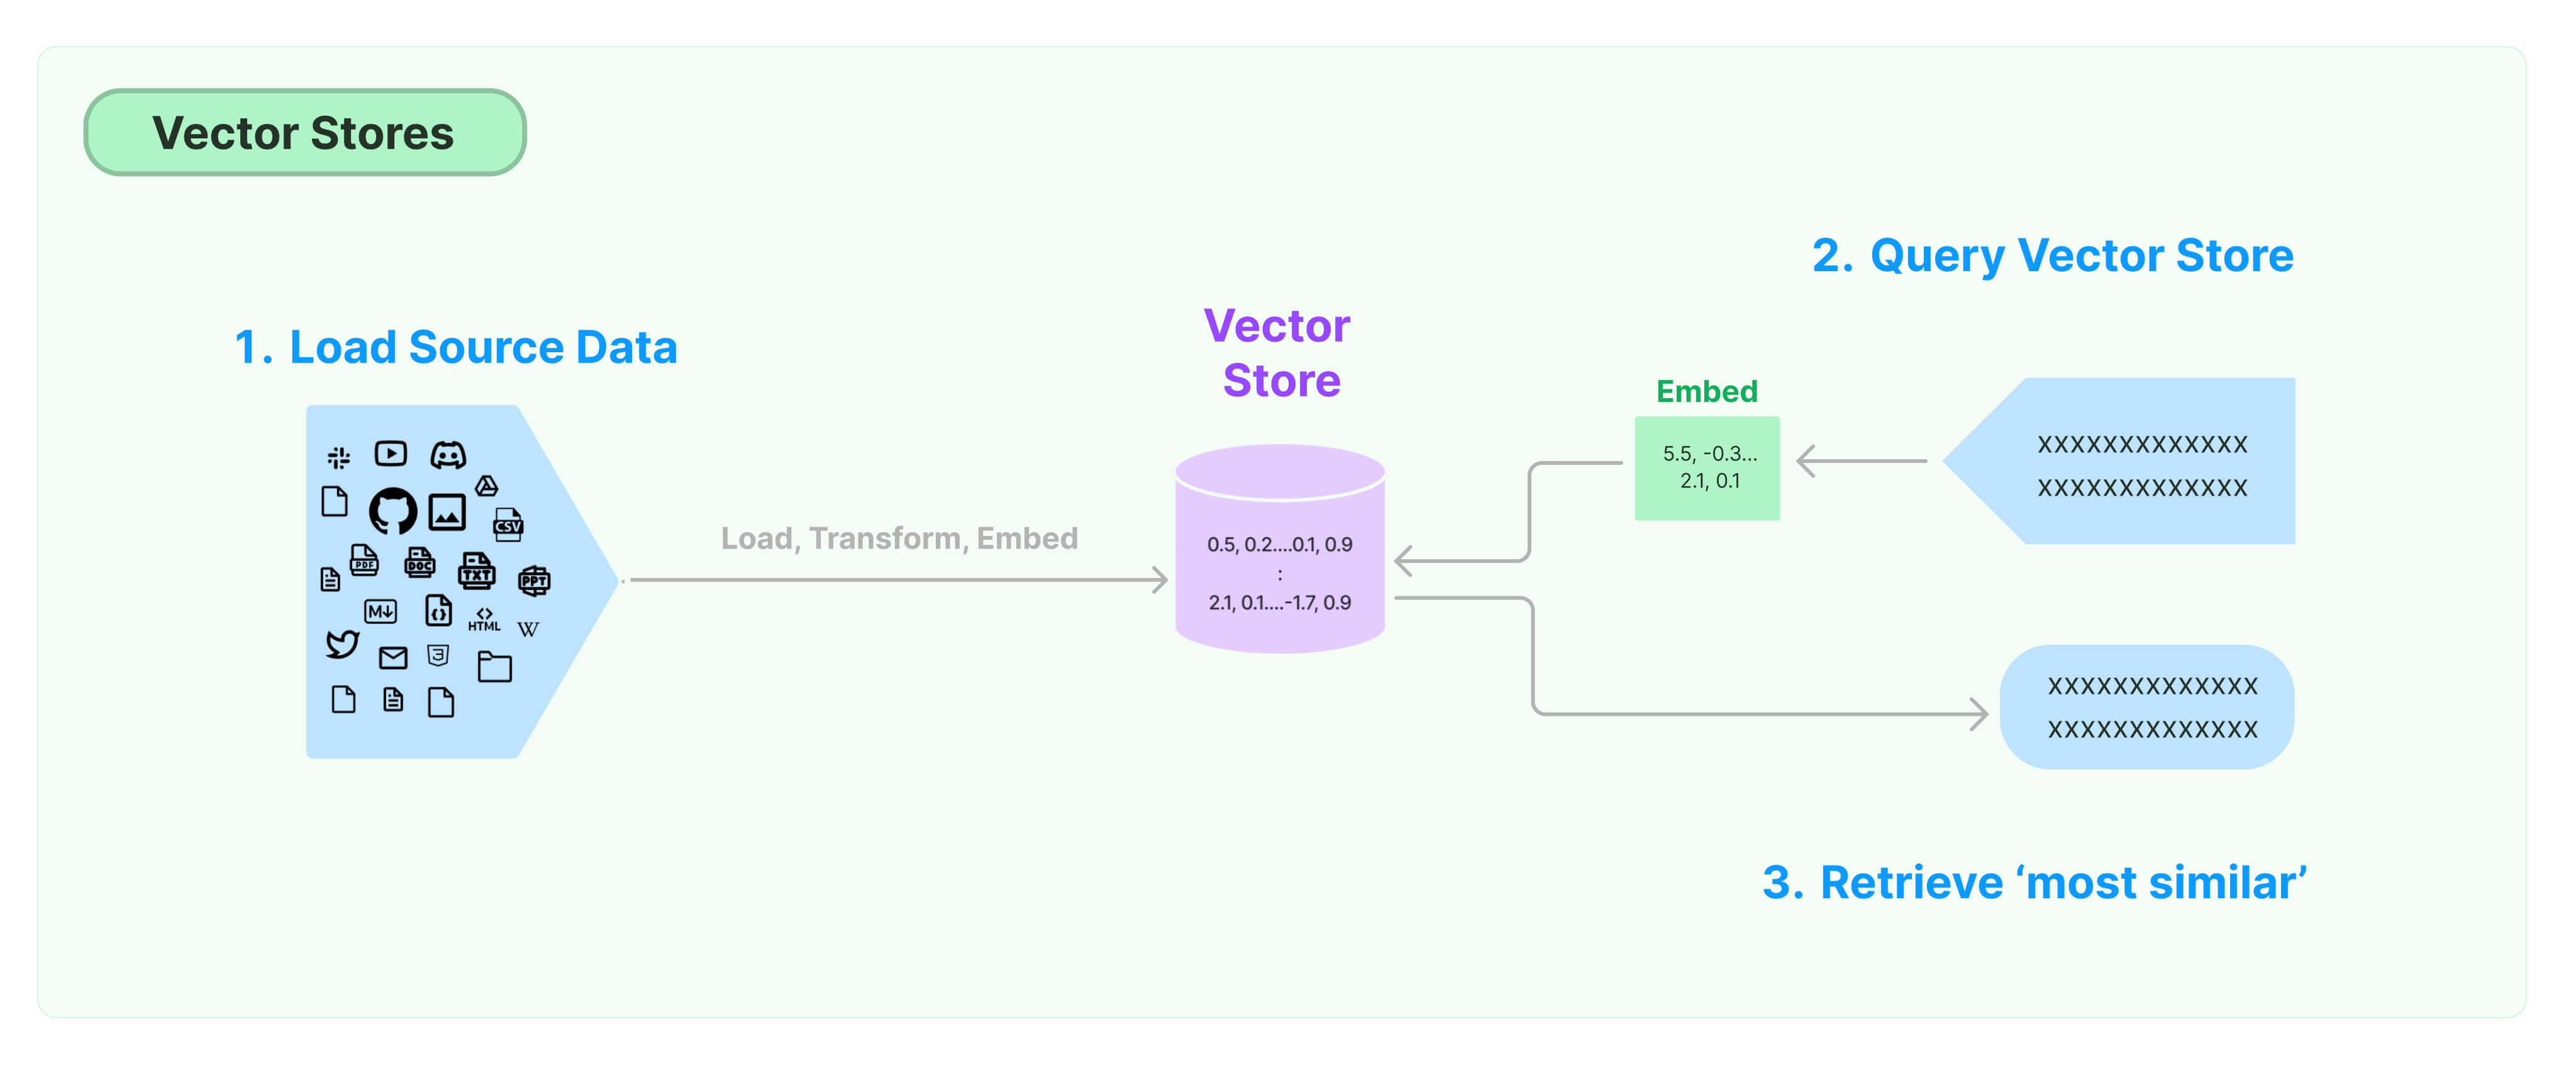

In [1]:
## Data ingestion

from langchain_community.document_loaders import TextLoader
loader=TextLoader("speech.txt")
text_documents=loader.load()
text_documents[:20]


[Document(metadata={'source': 'speech.txt'}, page_content='Sisters and Brothers of America,\n\nIt fills my heart with joy unspeakable to rise in response to the warm and cordial welcome which you have given us. I thank you in the name of the most ancient order of monks in the world, I thank you in the name of the mother of religions, and I thank you in the name of millions and millions of Hindu people of all classes and sects.\n\nMy thanks, also, to some of the speakers on this platform who, referring to the delegates from the Orient, have told you that these men from far-off nations may well claim the honor of bearing to different lands the idea of toleration. I am proud to belong to a religion which has taught the world both tolerance and universal acceptance. We believe not only in universal toleration, but we accept all religions as true. I am proud to belong to a nation which has sheltered the persecuted and the refugees of all religions and all nations of the earth. I am proud to

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")


In [3]:
## Web based loader

from langchain_community.document_loaders import WebBaseLoader
import bs4

## load,chunk and index the content of the html page

loader=WebBaseLoader(web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
                     bs_kwargs=dict(parse_only=bs4.SoupStrainer(
                         class_=("post_title","post-content","post-header")

                     )))
text_documents=loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
## Pdf reader

from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader('1706.03762v7.pdf')
docs=loader.load()


In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents=text_splitter.split_documents(docs)
documents[:1]

[Document(metadata={'source': '1706.03762v7.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer

In [7]:
## Vector Embedding And Vector Store

from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_community.vectorstores import Chroma

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
db=Chroma.from_documents(documents[:20],embeddings)



d:\Langchain\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
## Vector database search

query="Who are the authors of the attention is all you need research paper"
result=db.similarity_search(query)
result[0].page_content

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence and con

In [9]:
## FAISS Vector Database

from langchain_community.vectorstores import FAISS
db1=FAISS.from_documents(documents[:20],embeddings)

In [10]:
## Vector database search

query="Who are the authors of the attention is all you need research paper"
result=db1.similarity_search(query)
result[0].page_content

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence and con

## Thank You